# BENG 212 HW 1 Solutions

## Winter 2020

### 1/21/2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

Read in the data file as a pandas dataframe. The following line will only work if the provided 'Homework_Data.xlsx' file is in the same folder as this one.

In [3]:
data = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Expression Data', index_col = 0)

data.head() #shows the top 5 rows

,base__wt_glc__1,base__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,rpoB__wt_lb__2,rpoB__rpoBE546V_031__1,rpoB__rpoBE546V_044__1,rpoB__rpoBE546V_lb__1,rpoB__rpoBE546V_lb__2,rpoB__rpoBE546V_glc__1,rpoB__rpoBE672K_glc__1,rpoB__rpoBE672K_glc__2,rpoB__rpoBE672K_lb__1,rpoB__rpoBE672K_lb__2
b0002,7.629317,7.714938,8.113347,8.240386,7.669640,7.471594,6.915225,7.133376,7.784013,7.773122,...,5.191566,7.061956,7.142701,5.668539,5.649356,7.574388,7.625299,7.624386,5.640107,5.652065
b0003,7.219668,7.294158,7.918491,8.181859,7.470134,7.345953,6.652128,7.064316,7.554007,7.528505,...,5.547168,6.749462,6.945277,5.620395,5.646778,7.134694,7.374954,7.374000,5.369193,5.318577
b0004,7.343891,7.434121,7.248520,7.471647,7.205343,7.010567,6.059338,6.295427,7.059941,7.045726,...,5.549536,6.873381,6.964728,5.568881,5.612399,7.102728,7.538778,7.542841,5.402317,5.422052
b0005,4.378073,4.338134,3.758424,3.698816,4.655322,4.443782,3.207263,3.296815,4.524755,4.253390,...,1.390360,4.178768,4.312080,2.281869,3.053053,5.234553,4.862053,4.865263,2.510686,2.927543
b0006,4.793733,4.781124,4.696611,4.701444,4.687029,4.724970,4.635023,4.755118,4.756608,4.725641,...,4.579556,4.823312,4.943441,4.859915,4.794207,4.770893,4.823452,4.901313,4.785283,4.710034


In [4]:
metadata = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Experimental Conditions', index_col = 0)

metadata.head()

,Study,Condition ID,Replicate #,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Culture Type,Growth Rate (1/hr),Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,
base__wt_glc__1,Base,wt_glc,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,Batch,NaN,MiSeq,NaN,2,doi.org/10.1101/080929,GSE65643
base__wt_glc__2,Base,wt_glc,2,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,Batch,NaN,MiSeq,NaN,2,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,wt_dpd,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,DPD(0.2mM),37,7.0,Batch,0.000000,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,wt_dpd,2,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,DPD(0.2mM),37,7.0,Batch,0.000000,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,wt_fe,1,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,NaN,FeCl2(0.1mM),37,7.0,Batch,1.060606,MiSeq,NaN,2,doi.org/10.1038/ncomms5910,GSE54900


In [5]:
gene_info = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Gene Information', index_col = 0)
gene_info.head()

,start,stop,strand,gene_name,length,operon,cog
b0002,336,2799,+,thrA,2463,thrLABC,No COG Annotation
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown
b0006,5682,6459,-,yaaA,777,yaaA,Function unknown


## Problem 1: SVD and PCA

### a. Read “A tutorial on Principal Component Analysis” by Jonathon Shlens: https://arxiv.org/abs/1404.1100. Summarize the PCA workflow, its practical uses, and weaknesses of the method.

### <span style="color:red">5 points</span>

#### PCA Workflow

Either SVD or eigendecomposition will be accepted.

_SVD:_
1. Format data as matrix "X" of samples x features
2. Normalize such that feature means = 0, variances = 1
3. Apply SVD to get X = USV^T
4. The matrix V^T has the PC directions, product US has the loadings

_Eigendecomposition:_
1. Format data as matrix "X" of samples x features
2. Normalize such that feature means = 0, variances = 1
3. Calculate the covariance matrix
4. Calculate the eigenvectors and eigenvalues of the matrix, and sort by decreasing eigenvalues
5. The eigenvectors are the PC directions, the eigenvalues are the loadings.

#### PCA Practical uses
- Dimension reduction (grouping redundant features)
- Noise reduction (remove low variance components)
- Visualization/clustering (biplots) 
- Feature selection (identify prominent features in major components)

#### PCA Weaknesses
- Orthogonality assumption: produces linearly independent components, even if the natural 'components' in the data are linearly dependent (if this is the case, use ICA)
- Linearity assumption: misses non-linear dependencies (alternative w/out this weakness: kernelPCA)
- Dense and signed component matrix: all components use all features, so there will be no inherent clustering and it will be more difficult to interpret (alternatives: ICA, NMF)

### b. Calculate the covariance matrix of the data and interpret the result. 

### <span style="color:red">10 points</span>

Here, I show two alternative ways of computing the covariance matrix that all do the same thing.

In [7]:
[m, n] = data.shape # save these for future formulas. m = #genes, n = #samples

# normalize the data
data_norm = pd.DataFrame(stats.zscore(data, axis = 1), 
                         columns = data.columns, index = data.index)

In [6]:
# compute the covariance matrix

# alternative #1: matrix multiplication
Cx = pd.DataFrame(1/n*np.matmul(data_norm.values, data_norm.T.values), 
                  index = data_norm.index, columns=data_norm.index)

# alternative #2: pandas covariance
Cx = data_norm.T.cov()*((n-1)/n) 

In [7]:
# display the 10x10 section
Cx.iloc[:10, :10] #iloc uses numbers instead of indices (which would be loc)

,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011
b0002,1.000000,0.959630,0.963361,0.720010,0.051232,-0.324235,0.291581,-0.274370,0.042044,-0.161523
b0003,0.959630,1.000000,0.928476,0.666982,0.123176,-0.373370,0.334435,-0.206179,-0.107304,-0.147875
b0004,0.963361,0.928476,1.000000,0.749417,0.073761,-0.295232,0.347563,-0.228006,0.142764,-0.157795
b0005,0.720010,0.666982,0.749417,1.000000,-0.046045,-0.118222,0.053684,-0.226731,0.344325,-0.103634
b0006,0.051232,0.123176,0.073761,-0.046045,1.000000,-0.274688,0.374562,-0.068767,-0.412171,-0.047750
b0007,-0.324235,-0.373370,-0.295232,-0.118222,-0.274688,1.000000,-0.582215,-0.300793,0.408631,0.276843
b0008,0.291581,0.334435,0.347563,0.053684,0.374562,-0.582215,1.000000,0.475914,-0.361384,-0.279192
b0009,-0.274370,-0.206179,-0.228006,-0.226731,-0.068767,-0.300793,0.475914,1.000000,-0.134005,-0.205349
b0010,0.042044,-0.107304,0.142764,0.344325,-0.412171,0.408631,-0.361384,-0.134005,1.000000,0.188025
b0011,-0.161523,-0.147875,-0.157795,-0.103634,-0.047750,0.276843,-0.279192,-0.205349,0.188025,1.000000


In [8]:
# remove the diagonal with subtraction
Cx_offdiag = np.subtract(Cx, np.multiply(Cx, np.identity(m)))

# obtain the top 5 gene pairs
# stack creates a series with the pairs as multi-indexers
# sort puts the highest values first if ascending = False
# [:10] takes the first ten elements, which will contain repeated pairs
# [::2] takes every second element, which eliminates the repeat pairs
top_5_cx = Cx_offdiag.stack().sort_values(ascending = False)[:10][::2]

top_5_cx

b1493  b3517    0.996136
b0552  b3505    0.994797
b0073  b0072    0.994072
b3993  b3991    0.993999
b3505  b2192    0.993030
dtype: float64

In [9]:
# look up these gene pairs
# create a dataframe to house this info
top_5_info = pd.DataFrame(columns = ['gene1', 'name1', 'operon1', 'cog1', 'gene2', 'name2', 'operon2', 'cog2'])

# iterate through the pairs. "enumerate" returns a number for easier indexing, too.
for num, gene_pair in enumerate(top_5_cx.index):
    # get information on each gene
    gene_info1 = gene_info.loc[gene_pair[0], ['gene_name', 'operon', 'cog']]
    gene_info2 = gene_info.loc[gene_pair[1], ['gene_name', 'operon', 'cog']]
    
    # store it in the dataframe we created using a list
    top_5_info.loc[num] =[gene_pair[0]] + gene_info1.tolist() + [gene_pair[1]] + gene_info2.tolist()
    
top_5_info

,gene1,name1,operon1,cog1,gene2,name2,operon2,cog2
0,b1493,gadB,gadBC,No COG Annotation,b3517,gadA,gadAXW,Amino acid transport and metabolism
1,b0552,insH1,insH-2,No COG Annotation,b3505,insH1,insH-11,No COG Annotation
2,b0073,leuB,leuLABCD,Amino acid transport and metabolism,b0072,leuC,leuLABCD,Amino acid transport and metabolism
3,b3993,thiE,thiCEFSGH,Coenzyme transport and metabolism,b3991,thiG,thiCEFSGH,Coenzyme transport and metabolism
4,b3505,insH1,insH-11,No COG Annotation,b2192,insH1,insH-8,No COG Annotation


These covariances are consistent with the expectation that covarying genes perform similar functions and/or are from the same operon:

- 0: two highly similar enzymes
- 1: two insertion sequences with identical names, which are highly likely to be co-stimulated
- 2: two genes from the same operon
- 3: two genes from the same operon
- 4: two insertion sequences with identical names (one of them is a repeat from pair #1)

### c. Define the eigenvalues and eigenvectors of a matrix. What are the requirements for their calculation? How is a covariance matrix guaranteed to satisfy these requirements?

### <span style="color:red">5 points</span>

#### Definition

- If we view matrices as transformations, then the eigenvectors are vectors in that transformation which only change by a scalar factor, meaning that they stretch or flip but do not rotate. 
- The scalar factor associated with the eigenvector is its eigenvalue (λv = Av)
- These are important becuase they represent characteristic directions in the matrix.

#### Requirements for calculation
- Can be computed for square matrices where non-trivial real solutions exist to det(A-λI)
- It can be shown that an n x n real symmetric matrices must have n real eigenvalues and orthogonal eigenvectors (though not necessarily distinct or non-zero, depending on the rank). Refer to http://farside.ph.utexas.edu/teaching/336k/Newton/node66.html

#### Covariance matrix
- Covariance matrices are square, real, and symmetric by definition. This satisfies the requirements.


### d. Calculate principal components and component weights by calculating the eigendecomposition of the covariance matrix of your data. Compare to the result of a PCA package to ensure your result. Be sure to use standardized data (zero mean, unit variance for each variable across samples).

### <span style="color:red">10 points</span>

In [10]:
# perform the eigenvalue decomposition. Orders by increasing variance.
eigval, eigvec = np.linalg.eigh(Cx)

# flip the direction using [::-1]
weights_eig = eigval[::-1]/m # divide by m so that sum(weights) == 1, weight[i] == explained variance
components_eig = eigvec[:, ::-1]

# keep only the first 101 PCs since these should be consistent for all packages
components_eig = components_eig[:, :101]
weights_eig = weights_eig[:101]

# convert components to pandas
components_eig = pd.DataFrame(components_eig, index = data.index)

In [11]:
# use the scikit learn (Sk) PCA package to compute PCA
pca = PCA()

data_SkPC = pca.fit_transform(data_norm.T)
components_Sk = pca.components_.T
weights_Sk = pca.explained_variance_ratio_

components_Sk = components_Sk[:, :101]
weights_Sk = weights_Sk[:101]

data_SkPC = pd.DataFrame(data_SkPC, index = data.columns)
components_Sk = pd.DataFrame(components_Sk, index = data.index)

In [12]:
# are the weights equal?

# because these are doubles, '==' won't work
# you can use the numpy.allclose() function

np.allclose(weights_Sk, weights_eig)

True

In [13]:
# are the components equivalent?

# note that the length of the vectors will be equivalent for these two methods
# but the direction can be flipped

comp_equivalence = [] # we will fill this list with true/false values for all components
for c in range(101):
    
    # this checks if they are actually equal OR if flipping one of them makes them equal
    comp_equivalence += [np.allclose(components_Sk[c], components_eig[c]) or 
                         np.allclose(components_Sk[c], -components_eig[c])]
all(comp_equivalence)

True

We see two 'True' values above, so the weights and components are the same.

In [14]:
mean_squared_error(components_Sk, components_eig)

0.0004992523950105326

### e. What are the five highest absolute weighted genes in the top component, and what are their biological roles?

### <span style="color:red">5 points</span>

In [15]:
# get the top component
top_component = components_Sk[0]

# turn the above series into its own dataframe to add info to it
top_component = top_component.to_frame(name = 'weight')

# add the absolute value
top_component['abs'] = top_component.weight.abs()

# sort
top_component = top_component.sort_values('abs', ascending = False)

# only care about the top 5
top_component = top_component.iloc[0:5]

# add the gene information
top_component = pd.concat([top_component, gene_info.loc[top_component.index]], axis =1)

top_component

,weight,abs,start,stop,strand,gene_name,length,operon,cog
b0419,0.035335,0.035335,437160,438135,-,yajO,975,xseB-ispA-dxs-yajO,Energy production and conversion
b2137,0.035125,0.035125,2226508,2227270,-,yohF,762,yohF,Function unknown
b4167,0.034980,0.034980,4394065,4395613,+,nnr,1548,yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC,Carbohydrate transport and metabolism
b3361,0.034800,0.034800,3490860,3491463,-,fic,603,yhfG-fic-pabA,"Cell cycle control, cell division, chromosome ..."
b3519,0.034652,0.034652,3669591,3671241,+,treF,1650,treF,Carbohydrate transport and metabolism


The biological roles of each gene are listed above under 'cog'. Except for the unknown gene, they all have to do with energy, carbohydrates, or the cell cycle. It seems that this PC is related to growth rate, which would make sense considering that that is highly variable.

For those interested, a deeper dive into function (not graded):
1. **yajO:** converts Ru5P to DXP, which provides a route from pentoses to terpenes and supports DXP production under thiamine starvation.
2. **yohF:** uncharacterized protein that is likely an oxidoreductase that binds NAD.
3. **nnr:** bifunctional protein that catalyzes NAD(P)HX epimerization and converts one of the epimers to NAD(P)H. This repairs NADH that has been damaged (converted to NADHX) by heat-dependent dehydration.
4. **fic:** probable adenylyltransferase that may have a role in cell division.
5. **treF:** Hydrolyzes trehalose to glucose, may be involved in returning to low osmolarity after salt shock

On closer inspection, they may all be different stress responses.

### f. Create a cumulative variance plot. How many components are necessary to capture 80% of the variance?

### <span style="color:red">5 points</span>

In [16]:
# get the cumulative variance
cum_var = weights_Sk.cumsum()

# find the number of components
index_80 = sum(cum_var <= .8)

# indices are zero-indexed, so the total number is one more than this
print('Components to capture 80% of variance: ', index_80+1)

Components to capture 80% of variance:  14


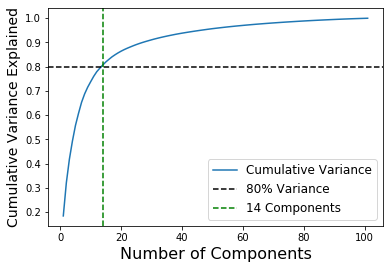

In [17]:
# make the plot

fig, ax = plt.subplots()
ax.plot(range(1, len(cum_var)+1), cum_var, label = 'Cumulative Variance')

# lines to label values of interest
ax.axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax.axvline(index_80+1, color = 'g', linestyle = '--', label = '14 Components')

# axes labels and legend
ax.set_xlabel('Number of Components', fontsize = 16)
ax.set_ylabel('Cumulative Variance Explained', fontsize = 14)
ax.legend(fontsize = 12)
None

### g. Construct a biplot of the data (project the samples onto the top two PCs and include directions for top genes). Based on the experimental treatments of the samples, what are the major apparent trends or observable separation of samples?

It may be useful to color the data by study or carbon source using the metadata file.

### <span style="color:red">15 points</span>

In [18]:
# get the top genes for the directional arrows of the biplot
# use 3 for both of the top two components
# this is essentially the 1e code block, but in a single line
pc1_genes = components_Sk[0].abs().sort_values(ascending = False)[:3].index
pc2_genes = components_Sk[1].abs().sort_values(ascending = False)[:3].index

# this df will store the stuff we need for the arrows
gene_directions = pd.DataFrame(index = pc1_genes.append(pc2_genes), columns = ['g_name', 'pc1', 'pc2'])

# look up the needed information one gene arrow at a time
for gene in gene_directions.index:
    gene_directions.loc[gene] = [gene_info.gene_name[gene], # name
                                 components_Sk.loc[gene, 0], # pc1
                                 components_Sk.loc[gene, 1]] # pc2

Text(0, 0.5, 'PC2: 13%')

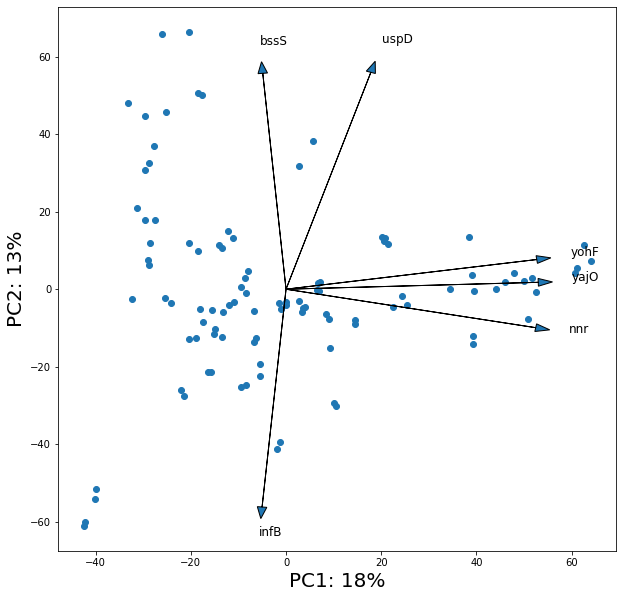

In [19]:
# initial biplot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(data_SkPC.loc[:, 0], data_SkPC.loc[:, 1])

# add the arrows. Use pandas .iterrows() to access the df easily
# scale is used to get arrows to be a visible length on the plot
scale = 1500
scale1 = 1700
for gene, row in gene_directions.iterrows():
    ax.arrow(0, 0, scale*row.pc1, scale*row.pc2, head_width = 2)
    ax.text(scale1*row.pc1, scale1*row.pc2, row.g_name, fontsize = 12)
ax.set_xlabel('PC1: %d%%'%(weights_Sk[0]*100), fontsize  = 20)
ax.set_ylabel('PC2: %d%%'%(weights_Sk[1]*100), fontsize = 20)

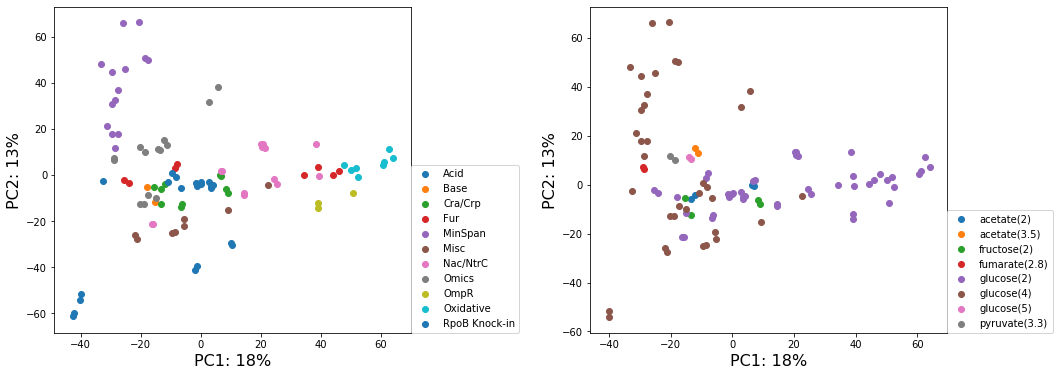

In [20]:
# to observe trends, color the biplot by metadata
fig, ax = plt.subplots(1,2, figsize = (16, 6))
plt.subplots_adjust(wspace = .5) # adds space for the legend

# make the two plots
for name, group in metadata.groupby('Study'):
    ax[0].scatter(data_SkPC.loc[group.index, 0], data_SkPC.loc[group.index, 1], label = name)

for name, group in metadata.groupby('Carbon Source (g/L)'):
    ax[1].scatter(data_SkPC.loc[group.index, 0], data_SkPC.loc[group.index, 1], label = name)

# change parameters at the same time
for a in ax:
    a.set_xlabel('PC1: %d%%'%(weights_Sk[0]*100), fontsize  = 16)
    a.set_ylabel('PC2: %d%%'%(weights_Sk[1]*100), fontsize = 16)
    a.legend(loc=(1, 0))

Text(0.5, 1.0, 'Growth rate is related to PC1')

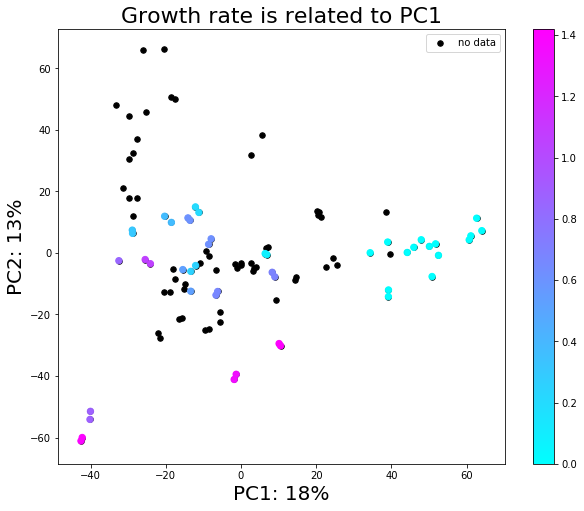

In [21]:
# bonus: test my growth rate hypothesis about PC1 from 1e
# do this by coloring each sample by its growth rate

fig, ax = plt.subplots(figsize = (10,8))

# plots all points in black
ax.scatter(data_SkPC.loc[:, 0], data_SkPC.loc[:, 1], c = 'k', s = 30, label = 'no data')

# plots points with growth data in a range of colors (on top of the black)
s = ax.scatter(data_SkPC.loc[:, 0], data_SkPC.loc[:, 1], c = metadata['Growth Rate (1/hr)'], cmap = 'cool', s = 40)

# shows the colorbar
plt.colorbar(s)
ax.legend()

ax.set_xlabel('PC1: %d%%'%(weights_Sk[0]*100), fontsize  = 20)
ax.set_ylabel('PC2: %d%%'%(weights_Sk[1]*100), fontsize = 20)
ax.set_title('Growth rate is related to PC1', fontsize = 22)

Major trends:

- The data groups well by study and carbon source
- The three groups that are farthest apart from the other samples are 'oxidative' (which is high in PC1 and therefore the most different from the other studies), 'minspan', and a subset of 'acid'.
- The prediction that growth rate is determined by PC1 (made in section 1e based on the top genes) appears to be accurate. Low growth rate conditions are usually high in PC1 (and vice versa), but this is not always the case.

### h. Reconstruct the dataset using the number of components that explain 95% of the variance. This can be thought of as a ‘denoised’ dataset. What is the average error of matrix values compared to the original data set? 

### <span style="color:red">5 points</span>

In [22]:
# find the number of components to 95% variance

index_95 = sum(weights_Sk.cumsum() <= .95)
print('Components to capture 95% of variance: ', index_95+1)

Components to capture 95% of variance:  46


In [23]:
# make the matrices smaller
components_95 = components_Sk.loc[:, :index_95]
data_PC95 = data_SkPC.loc[:, :index_95]

# multiply them back together (transposing the samples matrix)
data_denoised = np.matmul(components_95.values, data_PC95.T.values)
data_denoised = pd.DataFrame(data_denoised, index = data.index, columns = data.columns)

In [24]:
# compute the average error
error = data_denoised - data_norm
error = error/data_norm
abs_error = error.abs()
average_error = abs_error.stack().mean()

# compute the mean squared error
mse = mean_squared_error(data_norm, data_denoised)

print('Average percent error = %.2f%%'%(average_error*100))
print('Mean squared error = %.4f%%'%(mse))

Average percent error = 189.59%
Mean squared error = 0.0499%


## 2. ICA

### a. Read “A tutorial on Independent Component Analysis” by Jonathon Shlens: https://arxiv.org/abs/1404.2986. Describe the ICA algorithm and workflow. What is ‘Whitening’ and why is it helpful as a preprocessing step in ICA?

### <span style="color:red">5 points</span>

The ICA algorithm deconvolutes mixed signals to find statistically independent components.

Step one of ICA is to center the data such that feature means are 0. 

Next, SVD is applied to **"whiten"** the data. This step turns the matrix into an orthogonal matrix, which means there are far fewer degrees of freedom in the matrix we are approximating, dramatically speeding up computation without losing information relevant to independent components.

Next, ICA iteratively rotates the whitened data to minimize gaussianity of the component distributions. This operates under the assumption that random variables tend toward gaussian distributions, while the components ought to be as far from random as possible. 

ICA should be repeated many times to find robust solutions due to the stochasticity of the algorithm.

### b. Run ICA on the dataset. How many stable independent components do you find, either across different stochastic runs or with different parameters? Choose a stable component and determine whether genes in this component are functionally related based on annotation.

### <span style="color:red">20 points</span>

In [8]:
# run ICA, looking for n_comps and n_iterations
# for the first run, save the A matrix. the future runs are correlated
# with the first one in order to ensure stability

n_comps = 100
n_iter = 5

# initial run, which will define our solution
ica = FastICA(whiten=True, random_state=n_iter, n_components = n_comps)
A1 = ica.fit_transform(data_norm.T).transpose()
A1 = pd.DataFrame(A1, columns = data.columns)
S1 = pd.DataFrame(ica.mixing_, index = data.index)

# additional runs, which check for stability
for i in range(n_iter-1):
    # fit the data, this time we don't care about storing A
    ica = FastICA(whiten=True, random_state=n_iter-i, n_components = n_comps)
    ica.fit(data_norm.T)
    S = ica.mixing_
    
    # store the S matrices in a big dataframe
    if i == 0:
        other_S = S    
    else:
        other_S = np.append(other_S, S, axis = 1)

# add the gene names to keep track of what this is
other_S = pd.DataFrame(other_S, index = data.index)

In [26]:
# sanity check: Does X = S*A?
explained_variance_score(data_norm, np.matmul(S1.values, A1.values))

# if yes, the below value should be close to 1

0.999093067854012

#### Finding stability is tricky! Alternative #1: Pythonic

I published pseudocode for the following solution. It takes advantage of pandas functions in a way that may be confusing to new python users, but stores all the intermediates in an easy-to-access way.

In [9]:
from scipy.stats import pearsonr
from tqdm import tqdm

# build a correlations dataframe to quantify matches

# correlations will store each correlation between a component and 
# other components we are comparing against
correlations = pd.DataFrame(index = S1.columns, columns = other_S.columns)
for i in tqdm(S1.columns):
    for j in other_S.columns:
        correlations.loc[i, j] = abs(pearsonr(S1[i], other_S[j])[0])

100%|██████████| 100/100 [01:45<00:00,  1.19s/it]


In [28]:
# if the correlations are above thresh, we have a match!
thresh = 0.9
is_match = correlations > thresh

# if the number of matches is equal to the number of iterations, 
# then the component showed up every time, which means it is stable
stable = (is_match.sum(axis = 1) == n_iter-1)
print('Number of stable components: ', stable.sum())

Number of stable components:  70


#### Finding stability is tricky! Alternative #2: All in the for loop

If the above code doesn't make much sense, here is a way to do it in a for loop, treating each comparison one at a time and only saving what we actually care about: whether the component is stable or not.

In [29]:
#generating a list to store all stable components 
stable = []

# loop through all components in S
for i in S1.columns:
    # count the matches for this component in other_S
    num_match = 0
    for j in other_S.columns:
        # compare the gene loadings with correlation
        load_i = S1[i] 
        load_j = other_S[j]
        R = abs(stats.pearsonr(load_i,load_j)[0])
        
        # if the correlation is high enough, this is a match
        s_match = (R > 0.9)
        num_match += s_match 
    # if the above for loop found enough matches, this is stable!
    stable_YN = (num_match == n_iter-1)
    if stable_YN:
        stable += [i]
print('Number of stable components: ', len(stable))

Number of stable components:  70


In [30]:
# narrow to only the stable components
S1_stable = S1.loc[:, stable]
A1_stable = A1.loc[stable, :]

In [31]:
# take a stable component and look at its genes (see 1e)

stable_component = S1_stable.iloc[:, 5]
stable_component = stable_component.to_frame(name = 'weight')
stable_component['abs'] = stable_component.weight.abs()
stable_component = stable_component.sort_values('abs', ascending = False)
stable_component = stable_component.iloc[0:10]
stable_component = pd.concat([stable_component, gene_info.loc[stable_component.index]], axis =1)

stable_component

,weight,abs,start,stop,strand,gene_name,length,operon,cog
b0697,-6.463769,6.463769,724987,727036,-,kdpB,2049,kdpFABC,Inorganic ion transport and metabolism
b0698,-6.089844,6.089844,727058,728732,-,kdpA,1674,kdpFABC,Inorganic ion transport and metabolism
b1335,5.040555,5.040555,1399720,1400236,-,ogt,516,abgABT-ogt,"Replication, recombination and repair"
b2678,-4.659273,4.659273,2806009,2807074,+,proW,1065,proVWX,Amino acid transport and metabolism
b0696,-4.618986,4.618986,724406,724979,-,kdpC,573,kdpFABC,Inorganic ion transport and metabolism
b2677,-4.555326,4.555326,2804814,2806017,+,proV,1203,proVWX,Amino acid transport and metabolism
b2679,-4.367379,4.367379,2807131,2808124,+,proX,993,proVWX,Amino acid transport and metabolism
b3764,4.316727,4.316727,3948085,3948424,+,yifE,339,maoP,Function unknown
b4256,4.085360,4.085360,4479033,4479537,-,yjgM,504,yjgM,Function unknown
b0695,-4.034090,4.034090,721729,724414,-,kdpD,2685,kdpDE,Signal transduction mechanisms


This component appears to be related to inorganic ion transport and metabolism. kdp genes are responsible for potassium ion transport, and the pro genes regulate proline, which is used in the response to osmotic stress. Yes, all these are related.

### c. How much variance in the data is captured by the stable components? For example, what is the error in reproducing the original matrix using only stable ICs?

### <span style="color:red">10 points</span>

In [32]:
# project the data from stable PCs 
data_proj = np.matmul(S1_stable.values, A1_stable.values)
data_proj = pd.DataFrame(data_proj, index = data.index, columns = data.columns)

In [33]:
# explained variance:
explained_variance_score(data_norm, data_proj)

0.6557026939904826

In [34]:
# error:
error_percent = (data_norm - data_proj)/data_norm*100
print(error_percent.stack().mean(), '%')

45.11970839767539 %


In [35]:
# mse:
mean_squared_error(data_norm, data_proj)

0.4073764538774297

## 3. Comparing Factorization Methods

### Read “Enter the Matrix: Factorization Uncovers Knowledge from Omics” by Stein-O’Brien et. al. https://www.cell.com/trends/genetics/fulltext/S0168-9525(18)30124-0. Contrast PCA, NMF, and ICA in their use in analyzing biological data. 

### <span style="color:red">5 points</span>

All three methods are matrix factorization methods, meaning that they decompose a data matrix into a one matrix mapping features to factors/components and another matrix showing the value of each factor in each sample. 

PCA maximizes variance and removes covariance. This gives orthogonal directions for each component, and each component can be ranked by the amount of variance it explains. It is also non-parametric and relatively easy to compute. Because the goal is simply to maximize variance, components may be a mixture of the actual signals and are not necessarily statistically independent.

NMF and ICA both differ from PCA in that they identify statistically independent signals, do not have an orthogonality assumption or ranking (all components are considered equally important), and are stochastic algorithms that require multiple computationally-intensive runs to ensure robustness of the decomposition. NMF and ICA differ in that NMF requires that all values be greater than or equal to zero while ICA does not. Because of this, NMF is only applicable when signals are additive. NMF is also generally used only on sparse matrices. 